In [45]:
import re
import os
import numpy as np
import pandas as pd
%matplotlib inline
import math
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords


def tokenizador(text):
    text = text.lower()
    intab = "áéíóú"
    outtab = "aeiou"
    str = text
    trantab = str.maketrans(intab, outtab)
    normalizado = str.translate(trantab)
    normalizado = re.sub(r'[^a-z0-9 ]','', normalizado)
    tokens = normalizado.split(" ")
    if "" in tokens:
        while "" in tokens:
            tokens.remove("")
    return tokens

def contador(terms, tokens):
    for token in tokens:
        if token in terms:
            terms[token] += 1
        else:
            terms[token] =  1
    return terms

terms = {}

with open("Quijote.txt") as archivo:
    for linea in archivo:
        tokens=tokenizador(linea)
        terms = contador(terms,tokens)


sorted_terms = dict(sorted(terms.items(), key=lambda x: x[1], reverse=True))

sorted_terms


{'que': 21616,
 'de': 18495,
 'y': 18271,
 'la': 10492,
 'a': 9933,
 'el': 9547,
 'en': 8284,
 'no': 6356,
 'se': 5139,
 'los': 4769,
 'con': 4275,
 'por': 3945,
 'lo': 3492,
 'las': 3486,
 'le': 3420,
 'su': 3388,
 'don': 2718,
 'del': 2668,
 'como': 2554,
 'me': 2345,
 'si': 2314,
 'mas': 2295,
 'quijote': 2245,
 'mi': 2207,
 'sancho': 2174,
 'es': 2145,
 'yo': 2077,
 'un': 1943,
 'dijo': 1808,
 'al': 1757,
 'para': 1465,
 'porque': 1400,
 'ni': 1377,
 'una': 1334,
 'tan': 1245,
 'o': 1217,
 'todo': 1181,
 'esta': 1165,
 'sin': 1158,
 'seor': 1065,
 'asi': 1065,
 'respondio': 1063,
 'ser': 1059,
 'bien': 1052,
 'ha': 1052,
 'sus': 1051,
 'habia': 1037,
 'pero': 1015,
 'merced': 900,
 'quien': 894,
 'esto': 886,
 'pues': 865,
 'vuestra': 852,
 'todos': 818,
 'este': 818,
 'ya': 785,
 'donde': 784,
 'cuando': 778,
 'era': 757,
 'cual': 749,
 'te': 726,
 'sino': 694,
 'dos': 685,
 'caballero': 677,
 'fue': 655,
 'ella': 604,
 'tu': 599,
 'decir': 578,
 'he': 539,
 'muy': 535,
 'hacer': 

In [47]:
datos={"words":[],"rank":[],"freq":[]}
rank = 1
terms_total = 0
with open("terminosQuijote.txt", "w") as f:
    for term, info in sorted_terms.items():
        datos["words"].append(term)
        datos["rank"].append(rank)
        datos["freq"].append(info)
        rank += 1
        terms_total += info
        f.write(f"{term} {info}\n")

df = pd.DataFrame(datos)
x = np.log(datos["rank"])
y = np.log(datos["freq"])
fit = np.polyfit(x,y,1)
polynomial = np.poly1d(fit)
y_estimated = np.exp(polynomial(x))


In [48]:
df = pd.DataFrame(datos)
print(df)

            words   rank   freq
0             que      1  21616
1              de      2  18495
2               y      3  18271
3              la      4  10492
4               a      5   9933
...           ...    ...    ...
23170    includes  23171      1
23171     produce  23172      1
23172   subscribe  23173      1
23173  newsletter  23174      1
23174        hear  23175      1

[23175 rows x 3 columns]


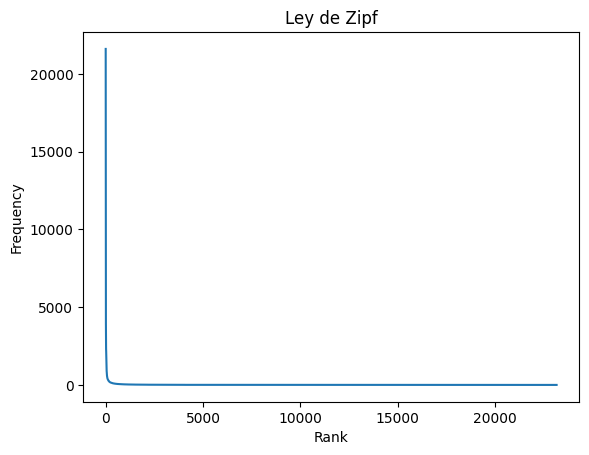

In [49]:
plt.plot(df["rank"],df["freq"], linestyle='solid')
plt.title('Ley de Zipf')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()


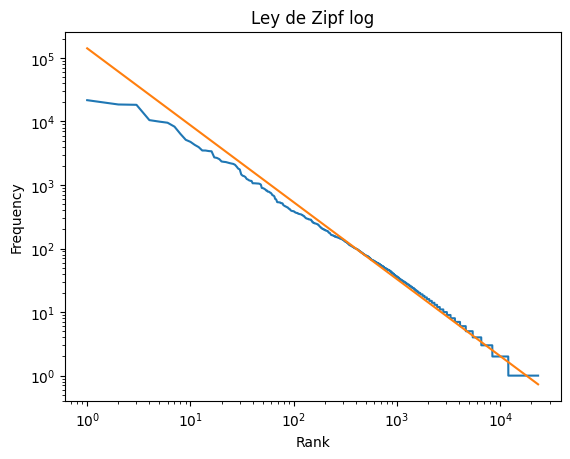

In [50]:
plt.loglog(df["rank"],df["freq"], linestyle='solid')
plt.loglog(df["rank"],y_estimated, linestyle='solid', label = "estimado")
plt.title('Ley de Zipf log')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()



In [51]:
terms_10por = int(0.1*terms_total)
terms_20por = int(0.2*terms_total)
terms_30por = int(0.3*terms_total)
terms_10 = []
terms_20 = []
terms_30 = []
print(terms_10por)

38664


In [53]:
for term, info in sorted_terms.items():
    if terms_10por>0:
        terms_10.append(term)
        terms_10por -=info
    if terms_20por>0:
        terms_20.append(term)
        terms_20por -=info
    if terms_30por>0:
        terms_30.append(term)
        terms_30por -=info
stops = set(stopwords.words('spanish'))

cant_term10 = len(terms_10)
cant_term20 = len(terms_20)
cant_term30 = len(terms_30)

pruning_10_percent = 0
pruning_20_percent = 0
pruning_30_percent = 0

print(terms_10)
print(terms_20)
print(terms_30)

pruning_terms_10 = []
pruning_terms_20 = []
pruning_terms_30 = []

for term in terms_10:
    if term in stops:
        pruning_10_percent += 1
    else: 
        pruning_terms_10.append(term)

for term in terms_20:
    if term in stops:
        pruning_20_percent += 1
    else: 
        pruning_terms_20.append(term)

for term in terms_30:
    if term in stops:
        pruning_30_percent += 1
    else: 
        pruning_terms_30.append(term)

pruning_terms_10.extend(term for term in terms_10 if term not in stops)
pruning_terms_20.extend(term for term in terms_20 if term not in stops)
pruning_terms_30.extend(term for term in terms_30 if term not in stops)

print("porcentaje de la poda coincide con palabras vacías 10%", pruning_10_percent/cant_term10*100)
print(terms_10)
print(pruning_terms_10)
print("porcentaje de la poda coincide con palabras vacías 20%", pruning_20_percent/cant_term20*100)
print(terms_20)
print(pruning_terms_20)
print("porcentaje de la poda coincide con palabras vacías 30%", pruning_30_percent/cant_term30*100)
print(terms_30)
print(pruning_terms_30)

['que', 'de']
['que', 'de', 'y', 'la', 'a']
['que', 'de', 'y', 'la', 'a', 'el', 'en', 'no', 'se', 'los', 'con']
porcentaje de la poda coincide con palabras vacías 10% 100.0
['que', 'de']
[]
porcentaje de la poda coincide con palabras vacías 20% 100.0
['que', 'de', 'y', 'la', 'a']
[]
porcentaje de la poda coincide con palabras vacías 30% 100.0
['que', 'de', 'y', 'la', 'a', 'el', 'en', 'no', 'se', 'los', 'con']
[]


In [54]:
m = fit[0]
b = fit[1]
c= np.exp(b)
beta = -1*m


In [55]:
sorted_terms

{'que': 21616,
 'de': 18495,
 'y': 18271,
 'la': 10492,
 'a': 9933,
 'el': 9547,
 'en': 8284,
 'no': 6356,
 'se': 5139,
 'los': 4769,
 'con': 4275,
 'por': 3945,
 'lo': 3492,
 'las': 3486,
 'le': 3420,
 'su': 3388,
 'don': 2718,
 'del': 2668,
 'como': 2554,
 'me': 2345,
 'si': 2314,
 'mas': 2295,
 'quijote': 2245,
 'mi': 2207,
 'sancho': 2174,
 'es': 2145,
 'yo': 2077,
 'un': 1943,
 'dijo': 1808,
 'al': 1757,
 'para': 1465,
 'porque': 1400,
 'ni': 1377,
 'una': 1334,
 'tan': 1245,
 'o': 1217,
 'todo': 1181,
 'esta': 1165,
 'sin': 1158,
 'seor': 1065,
 'asi': 1065,
 'respondio': 1063,
 'ser': 1059,
 'bien': 1052,
 'ha': 1052,
 'sus': 1051,
 'habia': 1037,
 'pero': 1015,
 'merced': 900,
 'quien': 894,
 'esto': 886,
 'pues': 865,
 'vuestra': 852,
 'todos': 818,
 'este': 818,
 'ya': 785,
 'donde': 784,
 'cuando': 778,
 'era': 757,
 'cual': 749,
 'te': 726,
 'sino': 694,
 'dos': 685,
 'caballero': 677,
 'fue': 655,
 'ella': 604,
 'tu': 599,
 'decir': 578,
 'he': 539,
 'muy': 535,
 'hacer': 

In [73]:
import math

print(beta)
# Calcular la posición de la palabra correspondiente al 10% del vocabulario
totalStops = len(sorted_terms)
print(totalStops)
posicion_10porc = math.ceil((totalStops * 0.1)**(1 / beta))
print(posicion_10porc)

# Obtener la frecuencia de la palabra en la posición correspondiente
frecuencia_10porc = list(sorted_terms.values())[posicion_10porc]

# Calcular la cantidad de palabras en el 10% del vocabulario
cantidad_palabras_10porc = len([f for f in sorted_terms.values() if f >= frecuencia_10porc])

print("Cantidad de palabras en el 10% del vocabulario:", cantidad_palabras_10porc)

1.2113767068003884
23175
600
Cantidad de palabras en el 10% del vocabulario: 601
